In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [5]:
data_frame = pd.read_csv('../Data/events.csv')

In [6]:
data_frame.shape

(2756101, 5)

In [7]:
data_frame.head(3)

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN


In [15]:
print (data_frame.isnull().any().any())

True


In [9]:
print (data_frame.isnull().any())

timestamp        False
visitorid        False
event            False
itemid           False
transactionid     True
dtype: bool


In [10]:
print (data_frame.isnull().sum())

timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733644
dtype: int64


## Showing unique Values of Event 

In [20]:
data_frame['event'].unique()

array(['view', 'addtocart', 'transaction'], dtype=object)

## Showing total number of each event

In [23]:
data_frame.groupby('event').count()

,timestamp,visitorid,itemid,transactionid
event,,,,
addtocart,69332,69332,69332,0
transaction,22457,22457,22457,22457
view,2664312,2664312,2664312,0


In [48]:
data_addtocart = pd.DataFrame(data_frame[data_frame['event'] == 'addtocart'].groupby('itemid')['visitorid'].count())
data_addtocart_sorted = data_addtocart.sort_values(['visitorid'], ascending=False)
data_addtocart_sorted.head()

,visitorid
itemid,
461686,306
312728,162
409804,156
320130,141
29196,136


In [50]:
len(data_addtocart_sorted)

23903

In [175]:
customers = list(data_addtocart_sorted.index)
items = data_addtocart_sorted['visitorid'].values
customers[0:30]

[461686,
 312728,
 409804,
 320130,
 29196,
 7943,
 48030,
 441852,
 445351,
 257040,
 316753,
 369447,
 234255,
 46232,
 17478,
 37029,
 9877,
 158666,
 384302,
 65273,
 279457,
 390591,
 339703,
 420960,
 208939,
 222888,
 444190,
 46156,
 10572,
 248455]

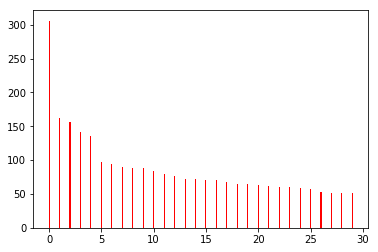

In [177]:
fig, ax = plt.subplots()
data = items[0:30]
N = len(data)
ind = np.arange(N)  # the x locations for the groups
width = 0.10 
ax.bar(ind, data, width, color='r')
plt.figure(figsize=(1,1))
plt.show()

## Creating Correlation

In [40]:
def corr_heatmap(data_frame, size=11):
    # Getting correlation using Pandas
    correlation = data_frame.corr()
    
    # Dividing the plot into subplots for increasing size of plots
    fig, heatmap = plt.subplots(figsize=(size, size))
    
    # Plotting the correlation heatmap
    heatmap.matshow(correlation)
    
    # Adding xticks and yticks
    plt.xticks(range(len(correlation.columns)), correlation.columns)
    plt.yticks(range(len(correlation.columns)), correlation.columns)

    # Displaying the graph
    plt.show()

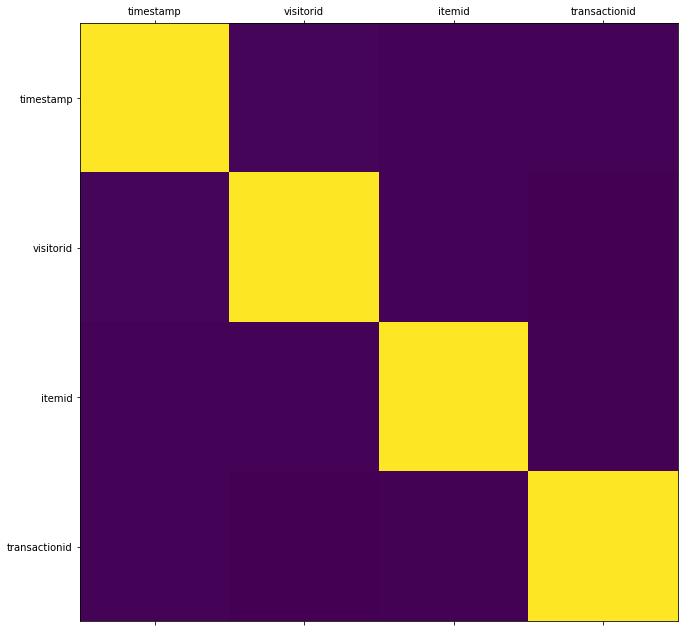

In [41]:
corr_heatmap(data_frame)

In [42]:
data_frame.shape

(2756101, 5)